<a href="https://colab.research.google.com/github/Charan0622/Charan_Scifor/blob/main/Machine%20Learning/Assessments/MACHINE%20LEARNING%20%26%20STATISTICS/ML_Statistics_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('survey lung cancer.csv')

# Display the first few rows of the dataset
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

# 1.Implement Linear Regression or MLR (any one)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [9]:
# Encode the target variable
label_encoder = LabelEncoder()
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [10]:
# Define features and target variable
X = df[['AGE', 'SMOKING', 'ALCOHOL CONSUMING']]
y = df['LUNG_CANCER']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.051001724245454884
R-squared: -0.633755233329405


# 2.Implement Decision Tree with Hyper Parameter Tuning (Mandatory)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
# Define features and target variable
X = df[['AGE', 'SMOKING', 'ALCOHOL CONSUMING']]
y = df['LUNG_CANCER']

In [19]:
# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

In [20]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [21]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [22]:
# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
# Best model
best_model = grid_search.best_estimator_

# 3.Implement Naive Bayes (Mandatory)


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
# Define features and target variable
X = df[['AGE', 'SMOKING', 'ALCOHOL CONSUMING']]
y = df['LUNG_CANCER']

In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [28]:
#Make predictions
y_pred = nb_model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9516129032258065


# 4. Implement Support Vector Machine (find SVM metrics till, Mandatory)


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Define features and target variable
X = df[['AGE', 'SMOKING', 'ALCOHOL CONSUMING']]
y = df['LUNG_CANCER']

In [32]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [35]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  2]
 [ 0 60]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5.Write down 10 differences between Descriptive statistics and inferential Statistics (Mandatory)
| Descriptive Statistics               | Inferential Statistics                 |
|--------------------------------------|----------------------------------------|
| Summarizes data                      | Makes predictions                      |
| Uses measures like mean, median, mode| Uses sample data to infer about population |
| Describes data                       | Generalizes from sample                |
| Doesn't infer beyond the data        | Infers beyond the data                 |
| Deals with present data              | Deals with future predictions          |
| Uses graphical representations       | Uses probability theory                |
| Measures of central tendency         | Hypothesis testing                     |
| Measures of dispersion               | Confidence intervals                   |
| Focuses on specific data points      | Focuses on population parameters       |
| Static in nature                     | Dynamic in nature                      |


# 6.How to handle missing values in machine learning ? Write a code (Mandatory)

In [39]:
from sklearn.impute import SimpleImputer

In [41]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

In [42]:
# Create an imputer for numeric columns (using mean strategy)
numeric_imputer = SimpleImputer(strategy='mean')

# Impute missing values for numeric columns
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [43]:
# Create an imputer for non-numeric columns (using most frequent strategy)
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for non-numeric columns
df[non_numeric_cols] = non_numeric_imputer.fit_transform(df[non_numeric_cols])

In [45]:
print(df.head())

  GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M  69.0      1.0             2.0      2.0            1.0   
1      M  74.0      2.0             1.0      1.0            1.0   
2      F  59.0      1.0             1.0      1.0            2.0   
3      M  63.0      2.0             2.0      2.0            1.0   
4      F  63.0      1.0             2.0      1.0            1.0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0              1.0       2.0       1.0       2.0                2.0       2.0   
1              2.0       2.0       2.0       1.0                1.0       1.0   
2              1.0       2.0       1.0       2.0                1.0       2.0   
3              1.0       1.0       1.0       1.0                2.0       1.0   
4              1.0       1.0       1.0       2.0                1.0       2.0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                  2.0               

# 7.Plot Any 3 visualizations (Mandatory)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

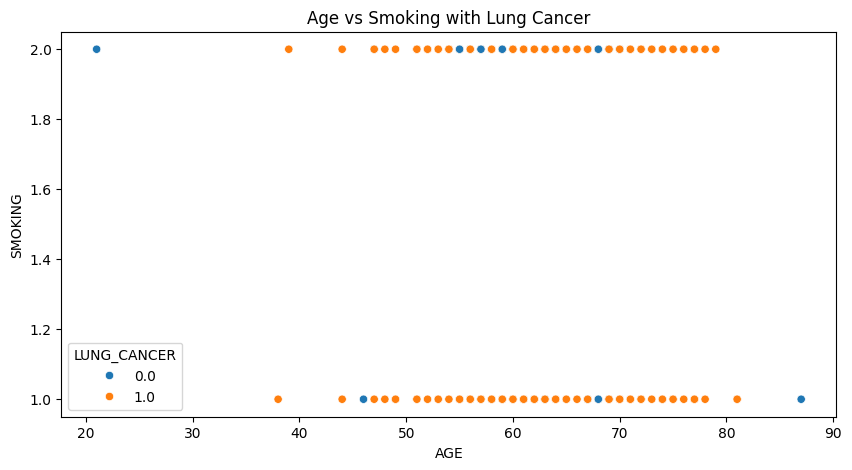

In [47]:
# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='AGE', y='SMOKING', hue='LUNG_CANCER')
plt.title('Age vs Smoking with Lung Cancer')
plt.show()

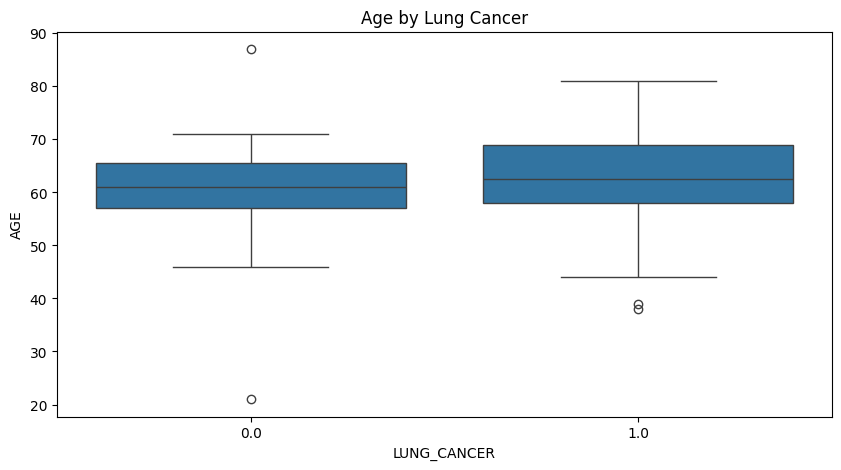

In [48]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='LUNG_CANCER', y='AGE')
plt.title('Age by Lung Cancer')
plt.show()

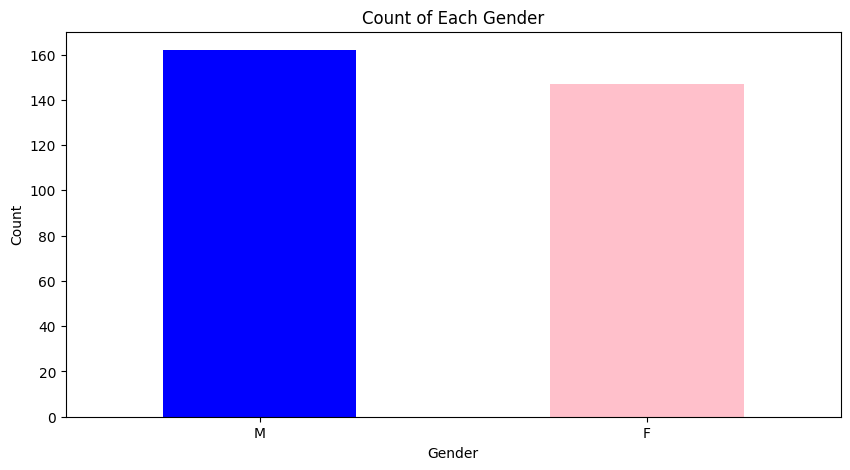

In [53]:
#bar chart
plt.figure(figsize=(10, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()